# Day 14 Regolith Reservoir
Simulate sand falling through spaces between the rocks. For further instructions, see https://adventofcode.com/2022/day/14.

Set preferences:

In [1]:
example = False
verbose = False
data_folder = 'data/'

Read lines of input data into a list.

In [2]:
if example:
    puzzle = '''498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9'''
    
else:
    with open(data_folder + 'rockwalls.txt', 'r') as f:
        puzzle = f.read()

rocks = puzzle.split('\n')
if verbose:
    print(rocks)

Format vertices as tuples. Identify the range of x and y.

In [3]:
start_x = 500
start_y = 0
max_x = start_x
min_x = start_x
max_y = start_y

j=0
for rock in rocks:
    corners = rock.split(' -> ')
    i = 0
    for corner in corners:
        x, y = corner.split(',')
        corners[i] = (int(x), int(y))
        max_x = max(int(x), max_x)
        min_x = min(int(x), min_x)
        max_y = max(int(y), max_y)
        i += 1
    rocks[j] = corners
    j += 1

if verbose:
    print(rocks)
    print()
    print('x from', min_x, 'to', max_x)
    print('y from 0 to', max_y)

Set up the grid space.

In [4]:
def view(scan):
    for row in scan:
        print(''.join(row))
        

def setup_grid():
    scan = [['.' for x in range(min_x, max_x+1)] for y in range(max_y+1)]
    scan[start_y][start_x - min_x] = '+'
    if verbose:
        view(scan)       
    return scan
        
        
scan = setup_grid()

Add the obstacles.

In [5]:
def draw_wall(a, b):
    #print(a, b)
    if a[0] == b[0]:
        if b[1] < a[1]:
            for y in range(a[1], b[1]-1, -1):
                scan[y][a[0] - min_x] = '#'
        else:
            for y in range(a[1], b[1]+1):
                scan[y][a[0] - min_x] = '#'
    if a[1] == b[1]:
        if b[0] < a[0]: 
            for x in range(a[0] - min_x, b[0]-1 - min_x, -1):
                scan[a[1]][x] = '#'        
        else: 
            for x in range(a[0] - min_x, b[0]+1 - min_x):
                scan[a[1]][x] = '#'

for rock in rocks:
    for corner1 in range(len(rock)-1):
        corner2 = corner1 + 1
        draw_wall(rock[corner1], rock[corner2])
        
view(scan)

.................+............................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
.......................................................

Introduce a unit of sand. The sand travels through the air. It either comes to rest in the rocks or freefalls into the abyss.

In [6]:
def introduce_sand():
    accumulated_sand = 0
    freefall = False
    blocked = False

    while not freefall and not blocked:
        sand_x = start_x - min_x
        sand_y = start_y
        rest = False

        while not rest and not freefall and not blocked:
            if sand_y == max_y:
                freefall = True
            elif scan[sand_y + 1][sand_x] == '.':
                sand_y = sand_y + 1

            elif sand_x == max_x:
                freefall = True
            elif scan[sand_y + 1][sand_x - 1] == '.':
                sand_x = sand_x - 1
                sand_y = sand_y + 1

            elif sand_x == min_x:
                freefall = True
            elif scan[sand_y + 1][sand_x + 1] == '.':
                sand_x = sand_x + 1
                sand_y = sand_y + 1

            else: 
                rest = True
                if sand_y == start_y:
                    blocked = True
                scan[sand_y][sand_x] = 'o'
                accumulated_sand += 1

        if verbose and example:
            view(scan)
            print('\n\n\n')
            
    return accumulated_sand
            

accumulated_sand = introduce_sand()

In [7]:
accumulated_sand

614

In [8]:
view(scan)

.................+............................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
..............................................................
................oo............................................
...............oooo....................................

## Part Two

A floor is added, consider it an infinite horizontal plane 2 levels below the lowest rock. How much sand can accumulate before the source is blocked?

First, add the floor to the grid. We know the sand doesn't spread more than one space per level as it accumulates. 


In [9]:
max_y = max_y + 2
max_x = start_x + max_y + 1
min_x = max(0, start_x - max_y - 1)

rocks.append([(min_x, max_y), (max_x, max_y)])

if verbose:
    print(rocks)

In [10]:
scan = setup_grid()

In [11]:
for rock in rocks:
    for corner1 in range(len(rock)-1):
        corner2 = corner1 + 1
        draw_wall(rock[corner1], rock[corner2])
        
if example:
    view(scan)

In [12]:
accumulated_sand = introduce_sand()
print(accumulated_sand)

26170


In [13]:
if example:
    view(scan)

In [14]:
def save(scan):
    with open(data_folder + 'savescan.txt', 'w') as f:
        for row in scan:
            f.write(''.join(row) +  '\n')

if not example:
    save(scan)

Here is a zoomed-out view of my saved scan, for the puzzle input.

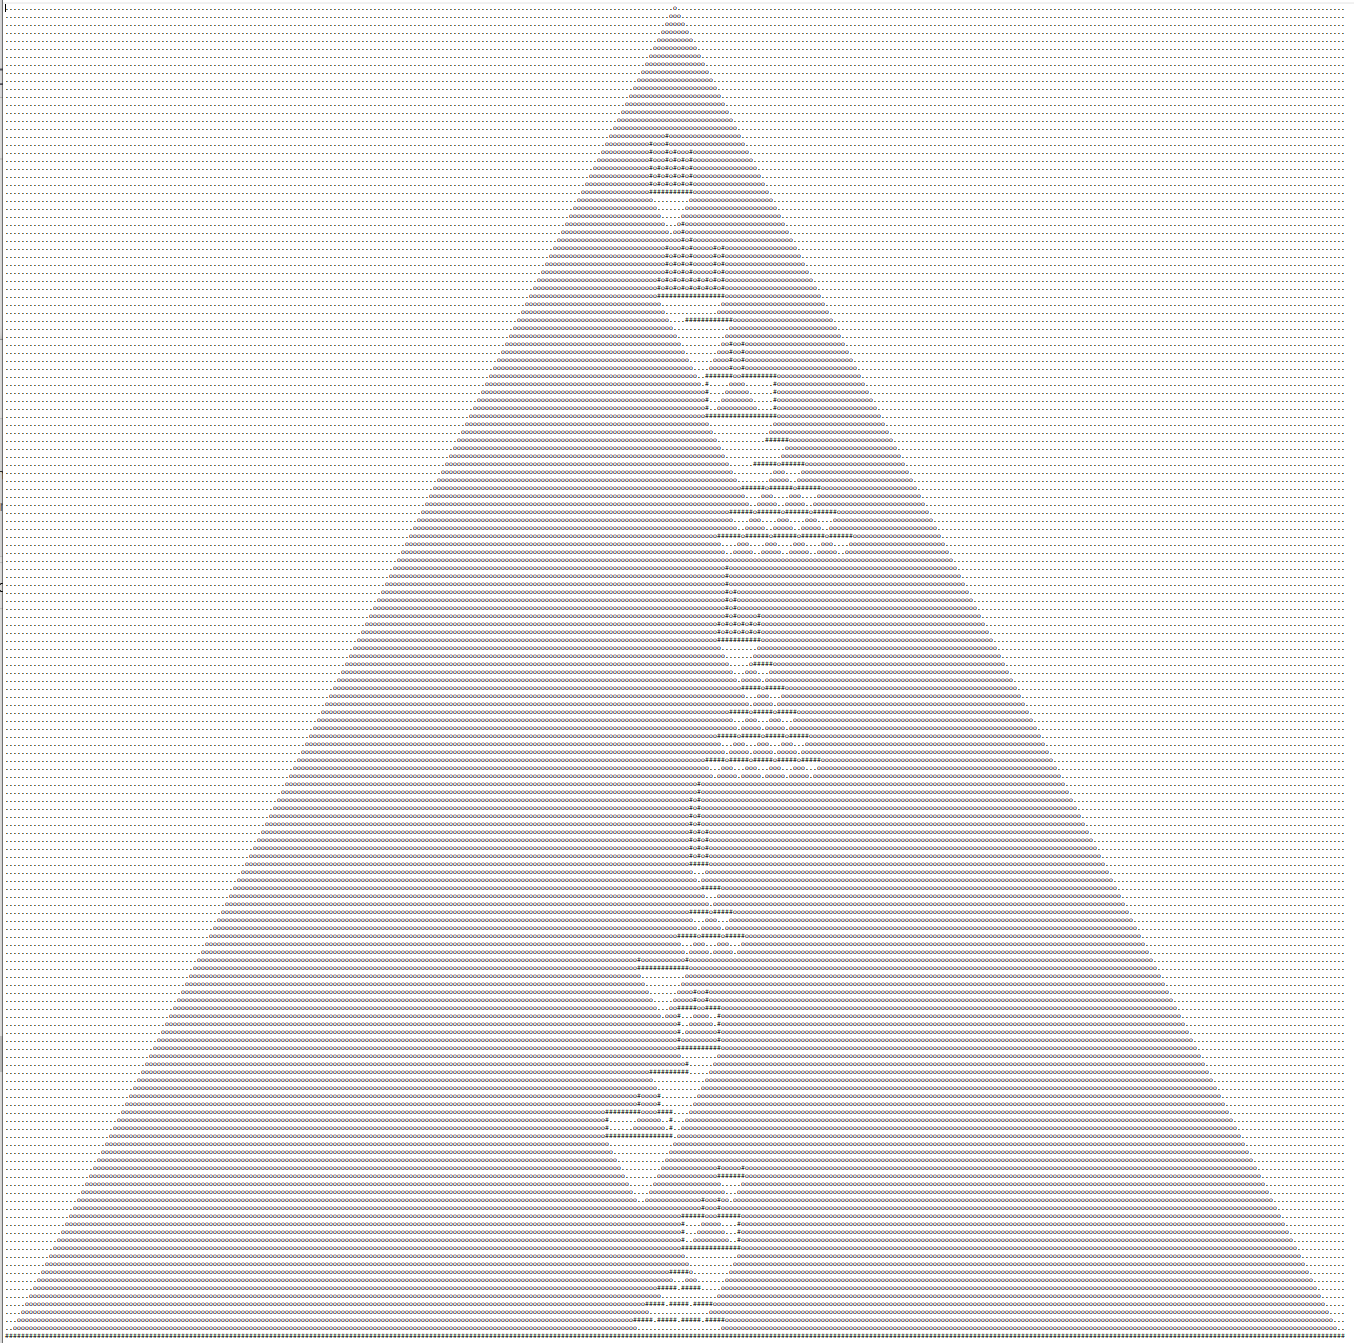